In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from tensorflow.keras.preprocessing import image 

In [3]:
from tensorflow.keras.optimizers import RMSprop

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2
import os

In [5]:
img = image.load_img('./new/Train/Happy/image.jpeg')

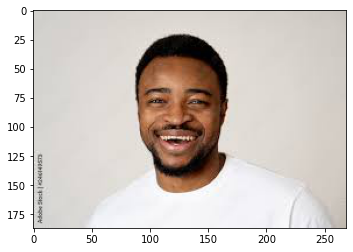

In [6]:
plt.imshow(img)

In [7]:
cv2.imread('./new/Train/Happy/image.jpeg').shape

(187, 269, 3)

In [8]:
Train = ImageDataGenerator(rescale =1/255)
Validate = ImageDataGenerator(rescale =1/255)

In [9]:
Train_dataset = Train.flow_from_directory('./new/Train/',
                                         target_size = (200,200),
                                         batch_size = 10,
                                         class_mode = 'binary')

Found 420 images belonging to 2 classes.


In [10]:
Validation_dataset = Validate.flow_from_directory('./new/Validate/',
                                         target_size = (200,200),
                                         batch_size = 10,
                                         class_mode = 'binary')

Found 56 images belonging to 2 classes.


In [11]:
Train_dataset.class_indices

{'Happy': 0, 'Sad': 1}

In [12]:

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3) , activation='relu',input_shape = (200,200,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3) , activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3) , activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
    
])

In [21]:
model.compile(optimizer=RMSprop(learning_rate = 0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [22]:
model_fit = model.fit(Train_dataset,
                     steps_per_epoch =3,
                      epochs = 30,
                     validation_data = Validation_dataset)

Epoch 1/30
3/3 [==============================] - 3s 957ms/step - loss: 0.0869 - accuracy: 1.0000 - val_loss: 1.3567 - val_accuracy: 0.6964
Epoch 2/30
3/3 [==============================] - 2s 832ms/step - loss: 0.9963 - accuracy: 0.7000 - val_loss: 0.6599 - val_accuracy: 0.7857
Epoch 3/30
3/3 [==============================] - 2s 848ms/step - loss: 0.0695 - accuracy: 0.9667 - val_loss: 0.5231 - val_accuracy: 0.8929
Epoch 4/30
3/3 [==============================] - 2s 884ms/step - loss: 0.2939 - accuracy: 0.9333 - val_loss: 0.5804 - val_accuracy: 0.8214
Epoch 5/30
3/3 [==============================] - 3s 1s/step - loss: 0.1012 - accuracy: 0.9667 - val_loss: 0.5387 - val_accuracy: 0.8750
Epoch 6/30
3/3 [==============================] - 3s 950ms/step - loss: 0.0343 - accuracy: 1.0000 - val_loss: 0.5552 - val_accuracy: 0.8929
Epoch 7/30
3/3 [==============================] - 2s 817ms/step - loss: 0.1242 - accuracy: 0.9667 - val_loss: 0.5626 - val_accuracy: 0.8750
Epoch 8/30
3/3 [=======

In [19]:
dir_path = 'new/Test'

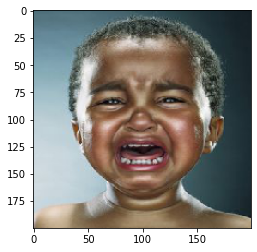

1/1 [==============================] - 0s 39ms/step
you are not happy


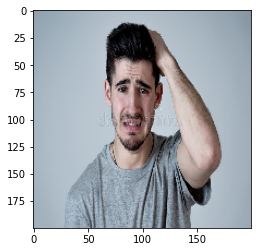

1/1 [==============================] - 0s 43ms/step
you are happy


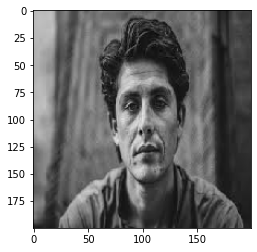

1/1 [==============================] - 0s 33ms/step
you are not happy


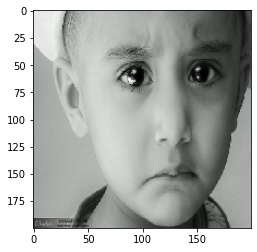

1/1 [==============================] - 0s 36ms/step
you are not happy


In [28]:
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size = (200,200))
    plt.imshow(img)
    plt.show()
    X = image.img_to_array(img)
    X =np.expand_dims(X,axis =0)
    images = np.vstack([X])
    Val = model.predict(images)
    if Val ==1:
        print("you are not happy")
        
    else:
        print("you are happy")